In [1]:
from neurapprox.NeuralNet import NeuralNet
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib.collections import PathCollection
from matplotlib.legend_handler import HandlerPathCollection, HandlerLine2D
from sklearn.preprocessing import StandardScaler
import time
# plt.style.use('ggplot')
plt.style.use('seaborn-dark-palette')
# %matplotlib inline
# matplotlib.use('nbagg')
# %matplotlib notebook
# %matplotlib qt 

In [2]:
wdir = "data/"
file = "AT.dat"

# Data: $k$, $r$, $x$, $A(k,r, x)$

In [3]:
data = np.loadtxt(wdir+file)

In [4]:
vec = data[:, :3]
afn = data[:, 3]
# scaler_r = StandardScaler()
# scaler_r.fit(vec[:, 1].reshape(-1,1))
# scaler_r.fit(vec)
# vec[:, 1] = scaler_r.transform(vec[:, 1].reshape(-1,1)).reshape(-1,)
# vec[:, 1] = vec[:, 1]/10000
# vec = scaler_r.transform(vec)
len(afn), np.shape(vec), np.shape(data)

(8556, (8556, 3), (8556, 4))

Text(0.5, 1.0, '$A(k, r, x)$')

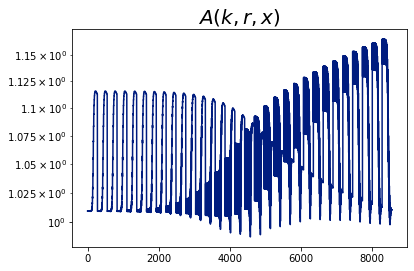

In [5]:
plt.plot(afn)
plt.yscale('log')
plt.title('$A(k, r, x)$', fontsize=20)

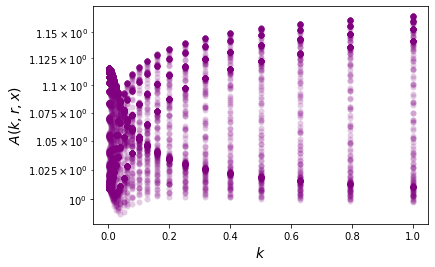

In [6]:
plt.scatter(vec[:,0], afn, linewidth=1e-5, alpha=0.2, c='purple')
plt.xlabel('$k$', fontsize=14)
plt.ylabel(r'$A(k,r,x)$', fontsize=14)
plt.yscale('log')

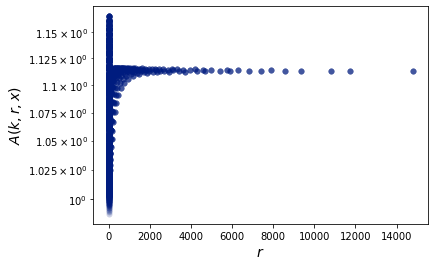

In [7]:
plt.scatter(vec[:,1], afn, linewidth=1e-7, alpha=0.2)
plt.xlabel('$r$', fontsize=14)
plt.ylabel(r'$A(k, r, x)$', fontsize=14)
plt.yscale('log')

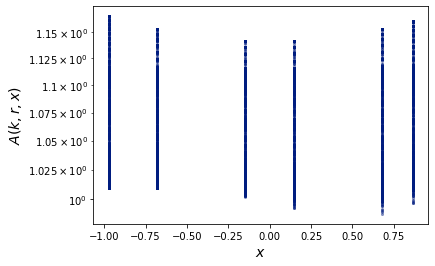

In [8]:
plt.scatter(vec[:,2], afn, marker='.', linewidth=1e-4, alpha=0.5)
plt.xlabel('$x$', fontsize=14)
plt.ylabel(r'$A(k, r, x)$', fontsize=14)
plt.yscale('log')

Text(0, 0.5, '$r$')

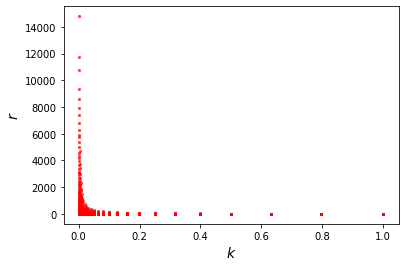

In [9]:
plt.scatter(vec[:,0], vec[:,1], marker='.', linewidth=1e-5, alpha=0.2, c='r')
plt.xlabel('$k$', fontsize=14)
plt.ylabel(r'$r$', fontsize=14)
# plt.yscale('log')
# plt.xscale('log')

Text(0, 0.5, '$x$')

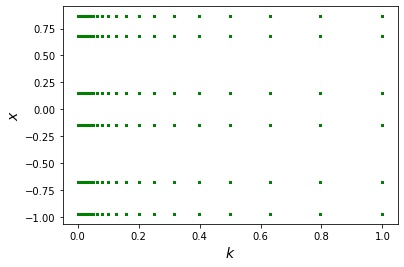

In [10]:
plt.scatter(vec[:,0], vec[:,2], marker='.', linewidth=1e-5, alpha=0.2, c='g')
plt.xlabel('$k$', fontsize=14)
plt.ylabel(r'$x$', fontsize=14)

Text(0, 0.5, '$x$')

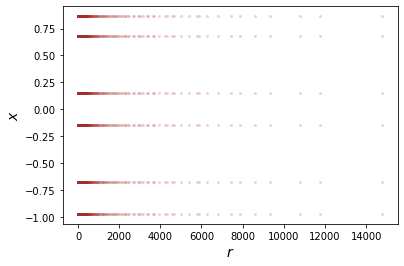

In [11]:
plt.scatter(vec[:, 1], vec[:,2], marker='.', linewidth=1e-5, alpha=0.2, c='brown')
plt.xlabel('$r$', fontsize=14)
plt.ylabel(r'$x$', fontsize=14)
# plt.xscale('log')

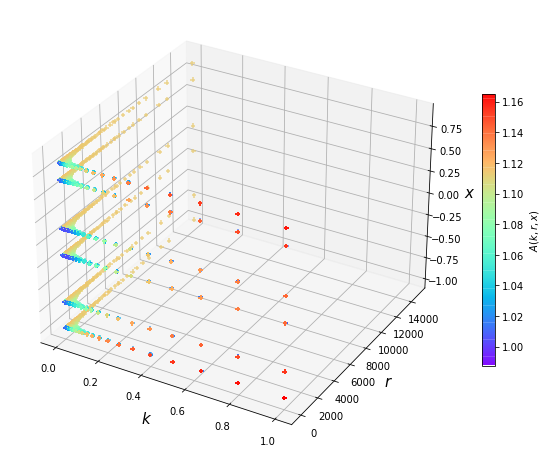

In [12]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(vec[:,0], vec[:,1], vec[:,2], marker='+', c=afn, cmap='rainbow', alpha=0.8)
ax.set_xlabel('$k$', fontsize=15)
ax.set_ylabel('$r$', fontsize=15)
ax.set_zlabel('$x$', fontsize=15)
plt.colorbar(p, shrink=0.5, label='$A(k, r, x)$')

In [13]:
# network = NeuralNet(samples, likes, [3, 100,100,1], epochs=200, batch_size=32,\
#                     learrning_rate=1e-5)
# funciona bien para 50mil muestras

In [14]:
network = NeuralNet(X=vec, Y=afn, topology=[3, 100, 100, 100, 1], epochs=200, batch_size=32,\
                    learrning_rate=1e-4)

In [15]:
network.train()

Training neural network...
Epoch 1/200
214/214 [==============================] - 1s 2ms/step - loss: 399.9061 - val_loss: 561.9839
Epoch 2/200
214/214 [==============================] - 0s 910us/step - loss: 222.2548 - val_loss: 0.6592
Epoch 3/200
214/214 [==============================] - 0s 833us/step - loss: 1.1692 - val_loss: 22.8840
Epoch 4/200
214/214 [==============================] - 0s 808us/step - loss: 2.4359 - val_loss: 1.1098
Epoch 5/200
214/214 [==============================] - 0s 801us/step - loss: 0.2377 - val_loss: 0.1934
Epoch 6/200
214/214 [==============================] - 0s 792us/step - loss: 0.3508 - val_loss: 0.9134
Epoch 7/200
214/214 [==============================] - 0s 795us/step - loss: 0.8835 - val_loss: 46.2058
Epoch 8/200
214/214 [==============================] - 0s 785us/step - loss: 37.9671 - val_loss: 0.9063
Epoch 9/200
214/214 [==============================] - 0s 783us/step - loss: 100.1015 - val_loss: 6.9003
Epoch 10/200
214/214 [===============

214/214 [==============================] - 0s 774us/step - loss: 1.8103e-04 - val_loss: 1.8849e-04
Epoch 78/200
214/214 [==============================] - 0s 770us/step - loss: 2.0080e-04 - val_loss: 1.9305e-04
Epoch 79/200
214/214 [==============================] - 0s 773us/step - loss: 2.4792e-04 - val_loss: 1.9376e-04
Epoch 80/200
214/214 [==============================] - 0s 782us/step - loss: 1.7524e-04 - val_loss: 1.8188e-04
Epoch 81/200
214/214 [==============================] - 0s 767us/step - loss: 2.3741e-04 - val_loss: 1.8445e-04
Epoch 82/200
214/214 [==============================] - 0s 767us/step - loss: 1.8248e-04 - val_loss: 1.8357e-04
Epoch 83/200
214/214 [==============================] - 0s 777us/step - loss: 1.7948e-04 - val_loss: 1.7915e-04
Epoch 84/200
214/214 [==============================] - 0s 760us/step - loss: 1.6780e-04 - val_loss: 3.2761e-04
Epoch 85/200
214/214 [==============================] - 0s 771us/step - loss: 2.1711e-04 - val_loss: 1.9267e-04
Epoch

Epoch 150/200
214/214 [==============================] - 0s 1ms/step - loss: 2.1817e-04 - val_loss: 2.0417e-04
Epoch 151/200
214/214 [==============================] - 0s 978us/step - loss: 2.0706e-04 - val_loss: 1.8255e-04
Epoch 152/200
214/214 [==============================] - 0s 884us/step - loss: 1.9325e-04 - val_loss: 2.0984e-04
Epoch 153/200
214/214 [==============================] - 0s 1ms/step - loss: 1.9585e-04 - val_loss: 1.9059e-04
Epoch 154/200
214/214 [==============================] - 0s 1ms/step - loss: 2.1291e-04 - val_loss: 1.8576e-04
Epoch 155/200
214/214 [==============================] - 0s 955us/step - loss: 2.1449e-04 - val_loss: 1.9362e-04
Epoch 156/200
214/214 [==============================] - 0s 839us/step - loss: 1.9421e-04 - val_loss: 2.2267e-04
Epoch 157/200
214/214 [==============================] - 0s 809us/step - loss: 1.9268e-04 - val_loss: 1.8074e-04
Epoch 158/200
214/214 [==============================] - 0s 961us/step - loss: 1.9430e-04 - val_loss: 

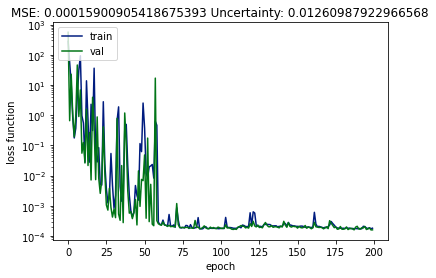

In [16]:
network.plot(ylogscale=True)

In [38]:
r = np.random.randint(len(afn)-1)
# r = np.argmin(likes)
test_sample = vec[r]

new_vector = np.array(test_sample).reshape(1,3)
# new_vector = np.array([0.7,0.5,0.5])
prediction = network.predict(new_vector)


print("Predicción: {}".format(float(prediction)))

Predicción: 1.0706431865692139


In [45]:
print("Real: {:.4f}, Predicción: {:.4f}, Diff: {:4f}".format(afn[r], float(prediction), np.abs(afn[r]- float(prediction))))

Real: 1.0764, Predicción: 1.0706, Diff: 0.005782


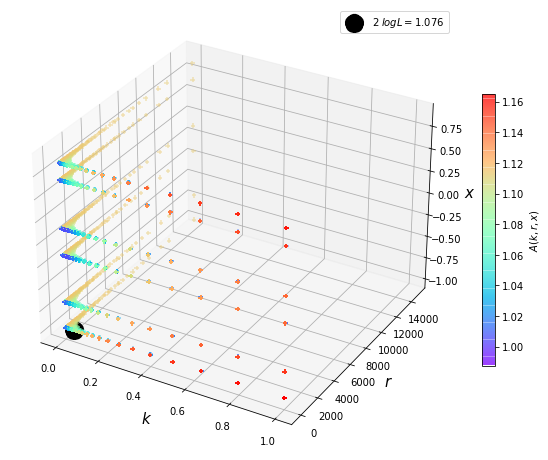

In [40]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(vec[:,0],vec[:,1], vec[:,2], marker='+', c=afn, cmap='rainbow', alpha=0.5)
ax.set_xlabel('$k$', fontsize=15)
ax.set_ylabel('$r$', fontsize=15)
ax.set_zlabel('$x$', fontsize=15)
plt.colorbar(p, shrink=0.5, label='$A(k, r, x)$')
# plt.colorbar(p,shrink=0.5, label='$2\;logL$')
ax.scatter(vec[r][0], vec[r][1], vec[r][2], marker='*', linewidth=15, c='black',\
           alpha=1.0, label='$2\;logL={:.3f}$'.format(afn[r]))
plt.legend()

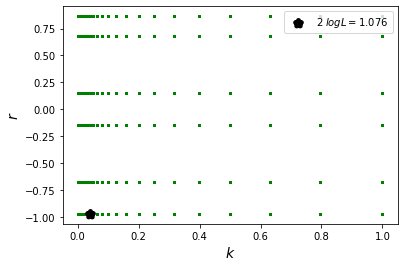

In [41]:
plt.scatter(vec[:,0], vec[:,2], marker='.', linewidth=1e-5, alpha=0.5, c='g')
plt.xlabel('$k$', fontsize=14)
plt.ylabel(r'$r$', fontsize=14)
plt.scatter(vec[r][0], vec[r][2], marker='*', linewidth=5, c='black',\
            alpha=1.0, label='$2\;logL={:.3f}$'.format(afn[r]))
plt.legend()

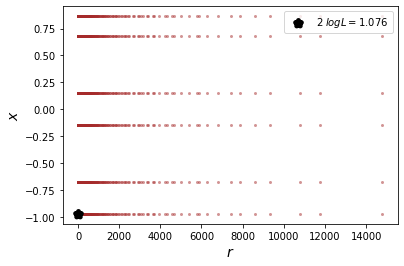

In [42]:
plt.scatter(vec[:,1],vec[:,2], marker='.', linewidth=1e-5, alpha=0.5, c='brown')
plt.xlabel('$r$', fontsize=14)
plt.ylabel(r'$x$', fontsize=14)
# plt.xscale('log')
plt.scatter(vec[r][1], vec[r][2],marker='*', linewidth=5, c='black',\
            alpha=1.0, label='$2\;logL={:.3f}$'.format(afn[r]))
plt.legend()

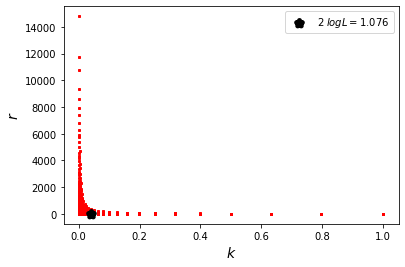

In [43]:
plt.scatter(vec[:,0],vec[:,1], marker='.', linewidth=1e-5, alpha=0.5, c='r')
plt.xlabel('$k$', fontsize=14)
plt.ylabel(r'$r$', fontsize=14)
# plt.yscale('log')
# plt.xscale('log')
plt.scatter(vec[r][0], vec[r][1],marker='*', linewidth=5, c='black',\
            alpha=1.0, label='$2\;logL={:.3f}$'.format(afn[r]))
plt.legend()

In [23]:
predictions = network.predict(vec)

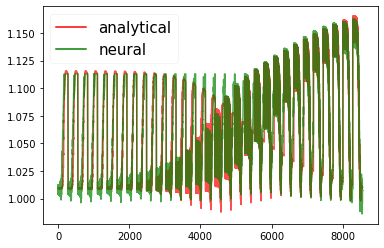

In [33]:
plt.plot(afn, alpha=0.7, label='analytical', c='red')
plt.plot(predictions, alpha=0.7, label='neural', c='green')
# plt.yscale('log')
# plt.xlim(50000,100000)
leg = plt.legend(fontsize=15, framealpha=0.2)

for lh in leg.legendHandles: 
    lh.set_alpha(1)

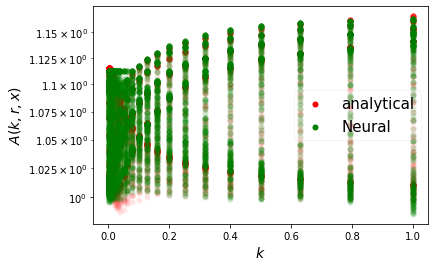

In [25]:
plt.scatter(vec[:,0], afn, linewidth=1e-5, alpha=0.1, c='red', label='analytical')
plt.scatter(vec[:,0], predictions, linewidth=1e-5, alpha=0.2, c='green', label='Neural')

plt.xlabel('$k$', fontsize=14)
plt.ylabel(r'$A(k, r, x)$', fontsize=14)
plt.yscale('log')

leg = plt.legend(fontsize=15, framealpha=0.2)

for lh in leg.legendHandles: 
    lh.set_alpha(1)

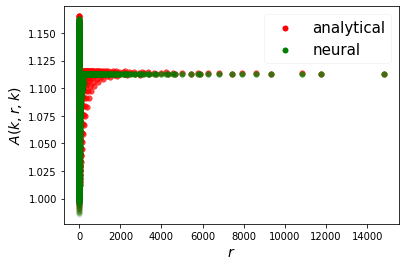

In [36]:
plt.scatter(vec[:,1], afn, linewidth=1e-7, alpha=0.2, marker='o', c='red', label='analytical')
plt.scatter(vec[:,1], predictions, linewidth=1e-7, alpha=0.2, marker='o', c='green', label='neural')
plt.xlabel('$r$', fontsize=14)
plt.ylabel(r'$A(k, r, k)$', fontsize=14)
# plt.yscale('log')

leg = plt.legend(fontsize=15, framealpha=0.2)

for lh in leg.legendHandles: 
    lh.set_alpha(1)

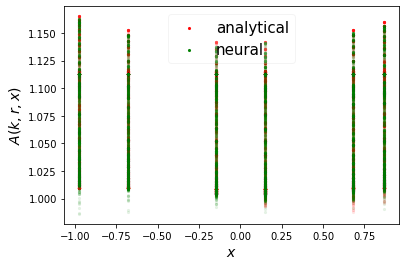

In [37]:
plt.scatter(vec[:,2], afn, marker='.', linewidth=1e-1, alpha=0.1, label='analytical', c='red')
plt.scatter(vec[:,2], predictions, marker='.', linewidth=1e-1, alpha=0.1, c='green', label='neural')
plt.xlabel('$x$', fontsize=14)
plt.ylabel(r'$A(k, r, x)$', fontsize=14)
# plt.yscale('log')

leg = plt.legend(fontsize=15, framealpha=0.2)

for lh in leg.legendHandles: 
    lh.set_alpha(1)

In [28]:
network.save_model('models/a_function.h5')

Neural net model models/a_function.h5 saved!
